# Лабораторна Робота №1 

<h4>Дранговський Назар ФІ-41</h4> <br>
<b>Тема</b>: Наука про дані: підготовчий етап <br><br>
<b>Мета роботи</b>: ознайомитися з основними кроками по роботі з даними – workflow від постановки задачі до написання пояснювальної записки, зрозуміти постановку задачі та природу даних, над якими виконується аналітичні операції

4_Republic of Crimea.csv
MIN_VHI_Republic of Crimea: 13.54
2012
MAX_VHI_Republic of Crimea: 86.53
1997

Drought in Republic of Crimea was:
      Year  Week    VHI
1314  2007    29  14.70
1583  2012    38  14.40
1584  2012    39  13.73
1585  2012    40  13.54
1586  2012    41  13.61
1587  2012    42  14.35

Extreme drought in Republic of Crimea was on area > 30% in: 
      Year  Week    VHI  Area-VHI-LESS-15
1314  2007    29  14.70             65.89
1583  2012    38  14.40             68.01
1584  2012    39  13.73             69.62
1585  2012    40  13.54             70.93
1586  2012    41  13.61             71.92
1587  2012    42  14.35             70.20


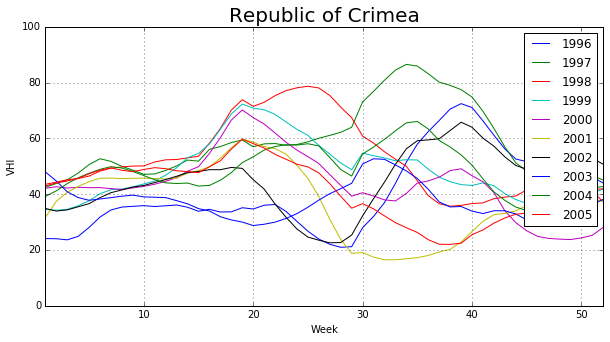

In [34]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import urllib2
import pandas as pd
import numpy as np
import csv
import time
#Бібліотека для роботи з графіками
import matplotlib.pyplot as plt 
%matplotlib inline 

#Функція, яка повертає справжній id країни з сайту 
def state_id(id):
    S=[24,25,5,6,27,23,26,7,11,13,14,15,16,17,18,19,21,22,8,9,10,1,3,2,4]
    return S[id-1] 

#Функція, яка повертає ім'я регіону
def get_state_name(id): 
    if (id == 1): 
        state = 'Vinnitsa'
        return state 
    elif (id == 2): 
        state = 'Volyn' 
        return state 
    elif (id == 3): 
        state = 'Dnipropetrovsk'
        return state 
    elif (id == 4): 
        state = 'Donetsk'
        return state 
    elif (id == 5): 
        state = 'Zhytomyr'
        return state 
    elif (id == 6):
        state = 'Zakarpattia'
        return state
    elif ( id == 7): 
        state = 'Zaporozhye' 
        return state 
    elif (id == 8): 
        state = 'Ivano-Frankivsk'
        return state 
    elif (id == 9): 
        state = 'Kyiv' 
        return state 
    elif (id == 10): 
        state = 'Kirovograd' 
        return state
    elif (id == 11): 
        state = 'Lugansk' 
        return state 
    elif (id == 12): 
        state = 'Lviv' 
        return state 
    elif (id == 13): 
        state = 'Nikolaev'
        return state 
    elif (id == 14): 
        state = 'Odessa' 
        return state 
    elif (id == 15): 
        state = 'Poltava' 
        return state
    elif (id == 16): 
        state = 'Rivnnska'
        return state 
    elif (id == 17): 
        state = 'Sumi' 
        return state 
    elif (id == 18): 
        state = 'Ternopil' 
        return state
    elif (id == 19): 
        state = 'Kharkov' 
        return state 
    elif (id == 20): 
        state = 'Kherson' 
        return state 
    elif (id == 21): 
        state = 'Khmelnytsky' 
        return state 
    elif (id == 22): 
        state = 'Cherkas'
        return state 
    elif (id == 23): 
        state = 'Chernivtsi' 
        return state 
    elif (id == 24): 
        state = 'Chernihiv'
        return state 
    elif (id == 25): 
        state = 'Republic of Crimea'
        return state

#Функція, якак повертає ім'я файлу, що завантажується
def filename(a,rs):
    strtime = time.strftime("%Hh%Mm%Ss")
    strdate = time.strftime("%d-%m-%Y")
    id = str(a)
    file_name = id+'_'+rs+'.csv'
    return file_name

#Функція збереження файлу до домашнього каталогу
def save(a, file):
    if (a<10):
        url=r"http://www.star.nesdis.noaa.gov/smcd/emb/vci/gvix/G04/ts_L1/ByProvince/Mean/L1_Mean_UKR.R0%s.txt" % a
    elif (a>=10):
        url=r"http://www.star.nesdis.noaa.gov/smcd/emb/vci/gvix/G04/ts_L1/ByProvince/Mean/L1_Mean_UKR.R%s.txt" % a
    else: 
        print("Error http adress!")
    vhi_url = urllib2.urlopen(url)    
    out = open(r"C:/Users/nazarskiy/IPython/rawdata/%s" % file,'wb')             
    out.write(vhi_url.read())    
    out.close()    

#Функція, яка завантажує csv-файл до фрейму та видаляє -1 і непотрібні символи
#Сирі дані містятья у каталозі rawdata, а відформатовані у каталог freshdata
def formatfile(file):
    arr = ['Year','Week','SMN','SMT','VCI','TCI','VHI','Area-VHI-LESS-15','Area-VHI-LESS-35']   
    df = pd.read_csv(r"C:/Users/nazarskiy/IPython/rawdata/%s" % file, index_col=False, header=1) 
    df = df[df.VHI != -1.0]      
    df.columns=arr  
    df.to_csv(r"C:/Users/nazarskiy/IPython/freshdata/%s" % file)

#Функція, яка виводить мінімальний VHI та рік в якому він був, для певного регіону за всі роки
def VHI_min(rs):
    file=filename(state_id(rs),get_state_name(rs)) 
    print (file)
    df = pd.read_csv(r"C:/Users/nazarskiy/IPython/freshdata/%s" % file) 
    print('MIN_VHI_'+get_state_name(rs)+': '+ str(df['VHI'].min()))
    df = df[df['VHI']==df['VHI'].min()]
    print(int(df.iloc[0,1]))
    #print (df[df['Year']==1988]['VHI'].min())   
      
#Функція, яка виводить максимальний VHI та рік в якому він був, для певного регіону за всі роки        
def VHI_max(rs):
    file=filename(state_id(rs),get_state_name(rs)) 
    df = pd.read_csv(r"C:/Users/nazarskiy/IPython/freshdata/%s" % file) 
    print('MAX_VHI_'+get_state_name(rs)+': '+str(df['VHI'].max()))
    df = df[df['VHI']==df['VHI'].max()]
    print(int(df.iloc[0,1]))

#Функція, яка виводить рік та тиждень в яких VHI<15   
def VHI_drought(rs):
    file=filename(state_id(rs),get_state_name(rs)) 
    df = pd.read_csv(r"C:/Users/nazarskiy/IPython/freshdata/%s" % file) 
    df=df[(df['Year']!=0) & (df['VHI']<15)]
    print('\nDrought in '+get_state_name(rs)+' was:')
    print df.loc[:,['Year','Week','VHI']] 

#Функція, яка виводить рік та тиждень в яких VHI<15, більше вказаного відсотка області;
def VHI_drought_area(rs,area):
    file=filename(state_id(rs),get_state_name(rs)) 
    df = pd.read_csv(r"C:/Users/nazarskiy/IPython/freshdata/%s" % file) 
    df=df[(df['VHI']<15) & (df['Area-VHI-LESS-15']>area)]
    print('\nExtreme drought in '+get_state_name(rs)+' was on area > '+str(area)+'%'+' in: ')
    print df.loc[:,['Year','Week','VHI','Area-VHI-LESS-15']] 
    
#Функція, яка будує графіки за певний проміжок часу, який визначається початковим роком та кінцевим
#Графіки будуються для певної області за різні роки, які показують залежність VHI від тижня року. 
def Plot_build(rs,y1,y2):  
    file=filename(state_id(rs),get_state_name(rs)) 
    if (y1<=y2):
        df = pd.read_csv(r"C:/Users/nazarskiy/IPython/freshdata/%s" % file) 
                    
        plt.figure(figsize=(10,5))
        plt.title(get_state_name(rs),fontsize=20)
        
        while (y1<=y2): 
            df1=df[(df['Year']==y1)]
            df1=df1.loc[:,['Year','Week','VHI']]  
            plt.plot(df1['Week'], df1['VHI'], label=y1)
            y1=y1+1
        
        plt.xlabel('Week')
        plt.ylabel('VHI')
        plt.ylim(0,100)
        plt.xlim(1,52)
        plt.legend()
        plt.grid()  
    else:
        print("Plot Error!")
    

if __name__ == '__main__':      
    
    #Задаємо номер області, яку хочемо дослідити
    id_state=25
    
    VHI_min(id_state)
    VHI_max(id_state)
    VHI_drought(id_state)
    VHI_drought_area(id_state,30)
    year1=1996
    year2=2005
    Plot_build(id_state,year1,year2)

In [36]:
#завантажуємо усі області
for idstate in range(1,26):      
    file_name = filename(state_id(idstate),get_state_name(idstate)) 
    save(state_id(idstate),file_name)
    print('File: '+file_name+'\n')
    formatfile(file_name) 

File: 24_Vinnitsa.csv

File: 25_Volyn.csv

File: 5_Dnipropetrovsk.csv

File: 6_Donetsk.csv

File: 27_Zhytomyr.csv

File: 23_Zakarpattia.csv

File: 26_Zaporozhye.csv

File: 7_Ivano-Frankivsk.csv

File: 11_Kyiv.csv

File: 13_Kirovograd.csv

File: 14_Lugansk.csv

File: 15_Lviv.csv

File: 16_Nikolaev.csv

File: 17_Odessa.csv

File: 18_Poltava.csv

File: 19_Rivnnska.csv

File: 21_Sumi.csv

File: 22_Ternopil.csv

File: 8_Kharkov.csv

File: 9_Kherson.csv

File: 10_Khmelnytsky.csv

File: 1_Cherkas.csv

File: 3_Chernivtsi.csv

File: 2_Chernihiv.csv

File: 4_Republic of Crimea.csv



<b>Висновок</b>: На цій лабораторній роботі я отримав елементарні знання в області DataScience. Дані для дослідження були взяті з сайту http://www.star.nesdis.noaa.gov. Цей сайт є центром по застосуванню супутникових систем і досліджень процесів, які відбуваються на нашій планеті. Дані, які я використовував пов'язані з індексом VHI - це вегетаційний індекс, який базується на відбитті видимого світла рослинним покривом. Вони були досліджені для різних областей України. Так звані сирі дані(raw data) були завантажені до фрейму та змінені  відповідно до завдання. Побудовано графіки для певної області за різні роки, які показують залежність VHI від тижня року. 